Read Data

In [26]:
import pandas as pd

try :
    df = pd.read_csv('./TLKM.csv')
    #print(df.head())
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)
    #print(df['Date'].head())
    #print(df['Date'].dt.year.unique())
    df = df[df['Date'].dt.year.between(2021, 2024)]
    print(f"Jumlah baris hasil filter: {len(df)}")
    df.set_index('Date', inplace=True)
    #print(filtered_df.head())
except Exception as e:
    print(e)

Jumlah baris hasil filter: 805


Visualisasi Data

In [31]:
import plotly.graph_objects as go

figure = go.Figure(data=[go.Candlestick(
    x=df.index,         
    open=df["Open"],     
    high=df["High"],    
    low=df["Low"],        
    close=df["Close"]     
)])

figure.update_layout(
    title='TLKM Price Stock',  
    xaxis_title="Date",         
    yaxis_title="Price",       
)

figure.show()

Eksplorasi data, engineering fitur, dan feature selection 

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 3926 to 4730
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    805 non-null    datetime64[ns, UTC]
 1   Open    805 non-null    int64              
 2   High    805 non-null    int64              
 3   Low     805 non-null    int64              
 4   Close   805 non-null    int64              
 5   Volume  805 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(5)
memory usage: 44.0 KB
None

Deskripsi Statistik:
              Open         High          Low        Close        Volume
count   805.000000   805.000000   805.000000   805.000000  8.050000e+02
mean   3683.178882  3719.972671  3643.485714  3681.972671  1.088572e+08
std     439.724117   440.637165   435.799147   439.315061  7.695868e+07
min    2758.000000  2793.000000  2679.000000  2740.000000  7.959900e+06
25%    3397.000000  3434.000000  3

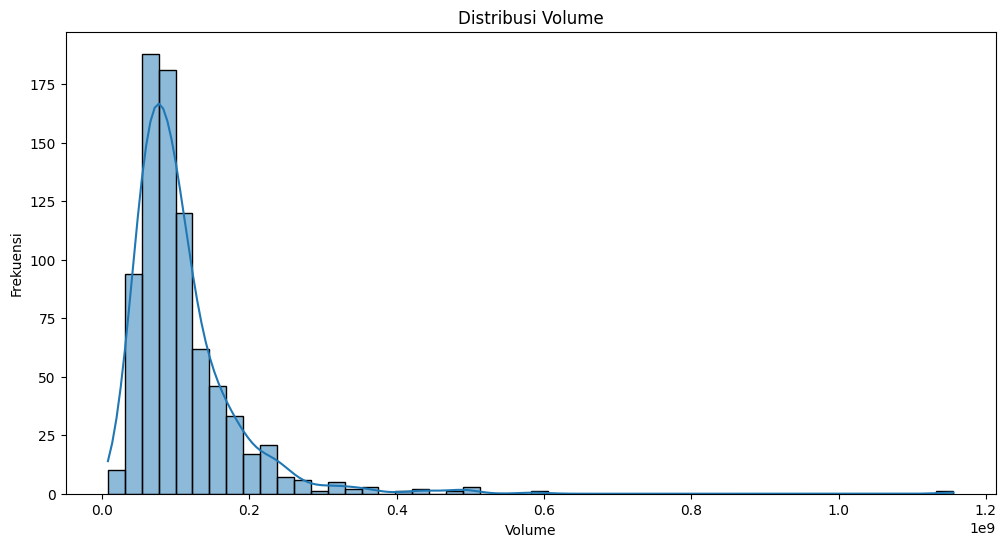

<Figure size 1200x600 with 0 Axes>

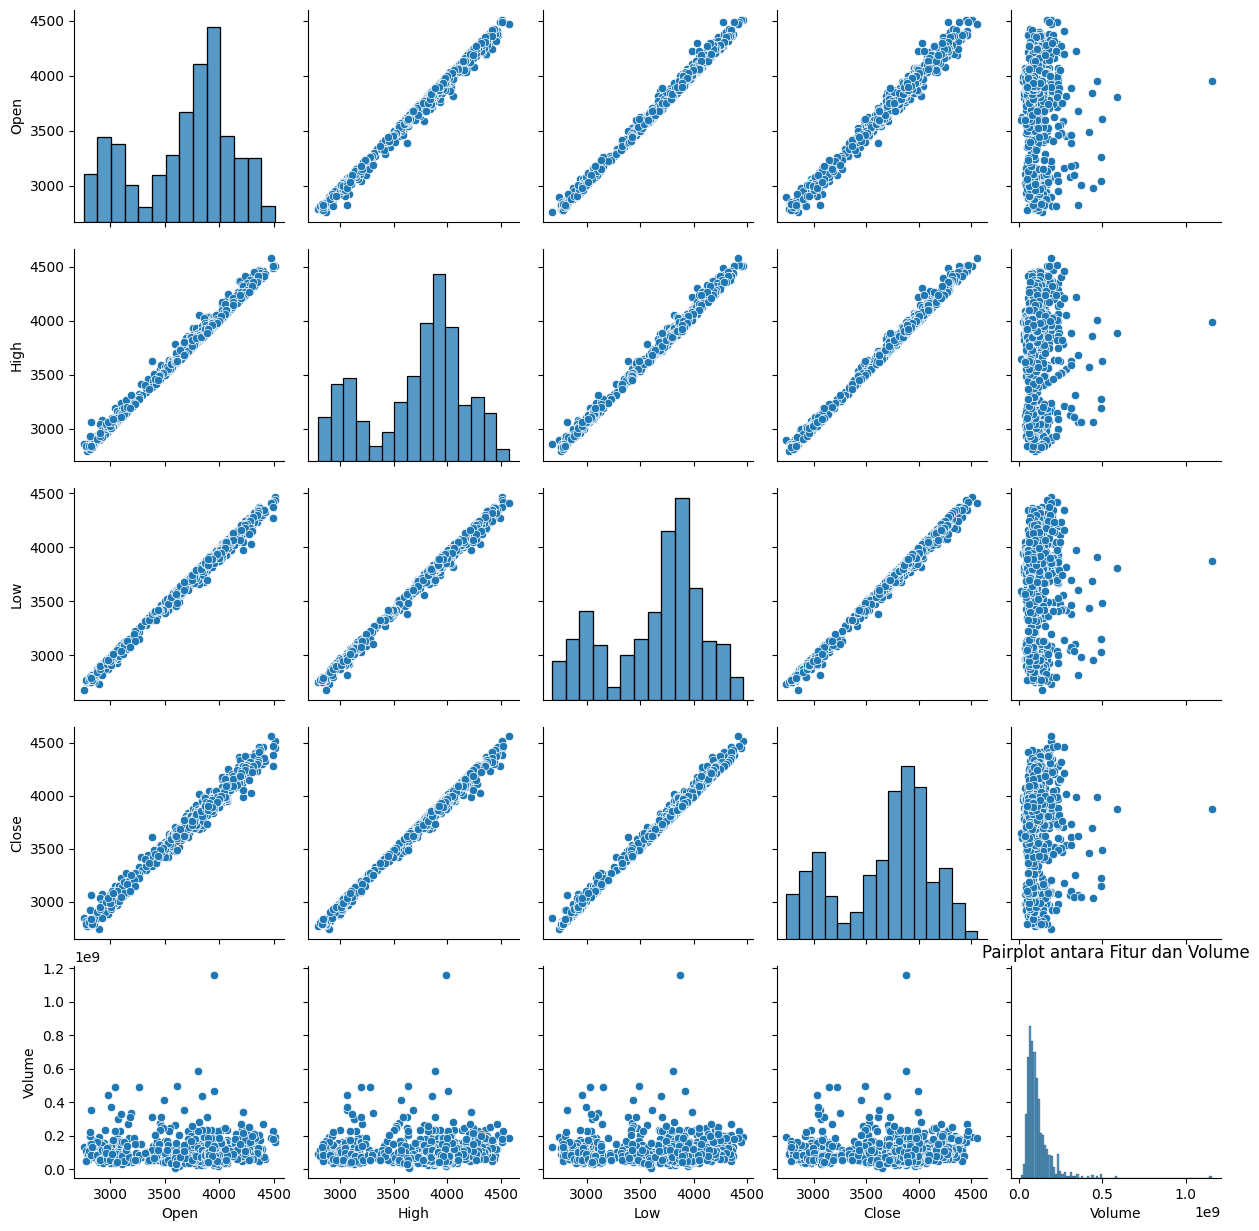

C:\Users\arc\AppData\Local\Temp\ipykernel_6896\4266882473.py:42: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


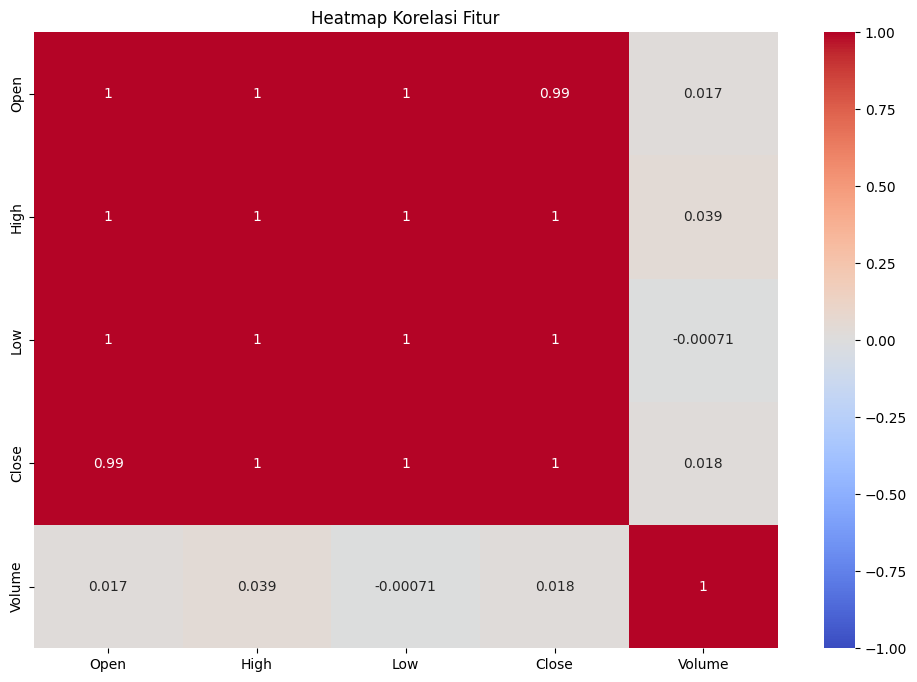

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
#df = pd.read_csv('./TLKM.csv')
df = pd.read_csv('./TLKM.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)
df = df[df['Date'].dt.year.between(2021, 2024)]

# Tampilkan informasi dasar tentang dataset
print("Info DataFrame:")
print(df.info())
print("\nDeskripsi Statistik:")
print(df.describe())

# Cek nilai yang hilang
print("\nNilai yang Hilang:")
print(df.isnull().sum())

# Cek distribusi data
print("\nDistribusi Data:")
print(df['Volume'].describe())

# Visualisasi distribusi data
plt.figure(figsize=(12, 6))
sns.histplot(df['Volume'], bins=50, kde=True)
plt.title('Distribusi Volume')
plt.xlabel('Volume')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi hubungan antara fitur dan target
plt.figure(figsize=(12, 6))
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Pairplot antara Fitur dan Volume')
plt.show()

# Korelasi antara fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Fitur')
plt.show()


In [47]:
# Mengubah tipe data Date jika belum
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ekstrak fitur tanggal
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = (df['Date'].dt.dayofweek >= 5).astype(int)

# Contoh transformasi fitur
df['Close_Open_Ratio'] = df['Close'] / df['Open']
df['High_Low_Range'] = df['High'] - df['Low']

# Menangani missing values jika ada
df.fillna(df.mean(), inplace=True)  # Mengganti missing values dengan rata-rata kolom

# Tampilkan beberapa fitur baru
print("\nBeberapa baris data setelah engineering fitur:")
print(df.head())



Beberapa baris data setelah engineering fitur:
                       Date  Open  High  Low  Close     Volume  Year  Month  \
0 2004-09-28 00:00:00+07:00   475   475  470    470   90095000  2004      9   
1 2004-09-29 00:00:00+07:00   470   470  461    470   29370000  2004      9   
2 2004-09-30 00:00:00+07:00   470   473  470    473   42927500  2004      9   
3 2004-10-01 00:00:00+07:00   473   481  470    478  108387500  2004     10   
4 2004-10-04 00:00:00+07:00   481   501  481    495  424210000  2004     10   

   Day  DayOfWeek  IsWeekend  Close_Open_Ratio  High_Low_Range  
0   28          1          0          0.989474               5  
1   29          2          0          1.000000               9  
2   30          3          0          1.006383               3  
3    1          4          0          1.010571              11  
4    4          0          0          1.029106              20  


C:\Users\arc\AppData\Local\Temp\ipykernel_12068\2778996768.py:16: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [53]:
# Hitung korelasi antara fitur dan target
correlation_matrix = df.corr()
target_corr = correlation_matrix['Volume'].sort_values(ascending=False)
print("\nKorelasi antara fitur dan Volume:")
print(target_corr)

# Menghitung korelasi antara fitur dan target close
correlation_matrix = df[['High', 'Low', 'Open', 'Close', 'Volume']].corr()
target_corr2 = correlation_matrix['Close'].sort_values(ascending=False)

print("\nKorelasi antara fitur dan Close:")
print(target_corr2)



Korelasi antara fitur dan Volume:
Volume              1.000000
High_Low_Range      0.369315
DayOfWeek           0.050721
Close_Open_Ratio    0.033605
Month               0.028973
Day                 0.017603
Year                0.006066
High               -0.012020
Close              -0.017928
Open               -0.018170
Low                -0.024144
IsWeekend                NaN
Name: Volume, dtype: float64

Korelasi antara fitur dan Close:
Close     1.000000
High      0.999763
Low       0.999742
Open      0.999497
Volume   -0.017928
Name: Close, dtype: float64


C:\Users\arc\AppData\Local\Temp\ipykernel_12068\3397988501.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Inisialisasi model dan RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Pilih jumlah fitur yang diinginkan
fit = rfe.fit(features, target)

# Tampilkan fitur yang dipilih
selected_features = pd.DataFrame({'Feature': features.columns, 'Selected': fit.support_})
selected_features = selected_features[selected_features['Selected'] == True]
print("\nFitur yang Dipilih oleh RFE:")
print(selected_features)



Fitur yang Dipilih oleh RFE:
  Feature  Selected
0    Open      True
1    High      True
2     Low      True
3   Close      True


MODEL (Predict Close)

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pilih fitur dan target
features = df[['Open', 'High', 'Low']]  
target = df['Close']  

# Pisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi dan latih model KNN
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Prediksi harga
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Menampilkan beberapa hasil prediksi
results = pd.DataFrame({'Aktual': y_test, 'Prediksi': y_pred})
print(results.head())


Mean Squared Error: 305.6723548046462
Root Mean Squared Error: 17.483488061729737
Mean Absolute Error: 11.643294614572339
R-squared: 0.9997667797046382
      Aktual  Prediksi
1258    1298    1289.8
2944    3136    3142.2
227      598     597.0
3258    3328    3333.2
1074     839     841.4


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# Pilih fitur dan target
features = df[['Open', 'High', 'Low']]
target = df['Close']

# Pisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Definisikan pipeline untuk normalisasi dan model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisasi
    ('knn', KNeighborsRegressor()) # Model KNN
])

# Definisikan grid parameter untuk pencarian hiperparameter
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance']
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Gunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Menampilkan beberapa hasil prediksi
results = pd.DataFrame({'Aktual': y_test.values, 'Prediksi': y_pred})
print(results.head())


Best parameters: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Mean Squared Error: 311.7928930910978
Root Mean Squared Error: 17.657658199520622
Mean Absolute Error: 11.397671727803703
R-squared: 0.9997621098883317
   Aktual     Prediksi
0    1298  1291.415305
1    3136  3135.780267
2     598   595.651815
3    3328  3330.613558
4     839   841.379413


In [58]:
from sklearn.linear_model import LinearRegression

# Inisialisasi dan latih model Regresi Linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prediksi volume
y_pred_lr = model_lr.predict(X_test)

# Evaluasi model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
rmse_lr = np.sqrt(mse_lr)
print(f"Linear Regression - Root Mean Squared Error: {rmse_lr}")
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression - Mean Absolute Error: {mae_lr}")
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - R-squared: {r2_lr}")

# Menampilkan beberapa hasil prediksi
results_lr = pd.DataFrame({'Aktual': y_test.values, 'Prediksi': y_pred_lr})
print(results_lr.head())


Linear Regression - Mean Squared Error: 290.3117883523315
Linear Regression - Root Mean Squared Error: 17.03853832792976
Linear Regression - Mean Absolute Error: 12.575565882366512
Linear Regression - R-squared: 0.9997784994293324
   Aktual     Prediksi
0    1298  1283.246132
1    3136  3134.491679
2     598   597.203730
3    3328  3330.384268
4     839   838.312142


In [59]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest - Root Mean Squared Error: {rmse_rf}")
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Mean Absolute Error: {mae_rf}")
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - R-squared: {r2_rf}")

# Model Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluasi Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
rmse_gb = np.sqrt(mse_gb)
print(f"Gradient Boosting - Root Mean Squared Error: {rmse_gb}")
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"Gradient Boosting - Mean Absolute Error: {mae_gb}")
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - R-squared: {r2_gb}")

# Cross-Validation untuk Random Forest
cv_scores_rf = cross_val_score(rf_model, features, target, cv=5, scoring='r2')
print(f"Random Forest - Cross-Validation R-squared: {np.mean(cv_scores_rf)}")

# Cross-Validation untuk Gradient Boosting
cv_scores_gb = cross_val_score(gb_model, features, target, cv=5, scoring='r2')
print(f"Gradient Boosting - Cross-Validation R-squared: {np.mean(cv_scores_gb)}")


Random Forest - Mean Squared Error: 339.5364203448642
Random Forest - Root Mean Squared Error: 18.42651405841225
Random Forest - Mean Absolute Error: 11.553302461559324
Random Forest - R-squared: 0.9997409422769373
Gradient Boosting - Mean Squared Error: 434.0590370768877
Gradient Boosting - Root Mean Squared Error: 20.83408354300442
Gradient Boosting - Mean Absolute Error: 14.39344905498645
Gradient Boosting - R-squared: 0.9996688239049416
Random Forest - Cross-Validation R-squared: 0.9658902775080088
Gradient Boosting - Cross-Validation R-squared: 0.9630598766693816
